# Data Processing

In [147]:
import json
import os
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import os
import numpy as np
import neurokit2 as nk

In [148]:
import pandas as pd

def convert_to_dataframe(user_data):
    # Extract user details
    details = user_data["user_details"]
    name = details['name']
    
    # Create DataFrame for timestamp and feature signals
    df = pd.DataFrame({
        "timestamp": user_data["timestamp"],  # Assuming these timestamps are in milliseconds
        "ECG": user_data["ecg"],
        "GSR": user_data["gsr"],
        "PPG_red": user_data["ppg_red"],
        "PPG_ir": user_data["ppg_ir"],
        "PPG_green": user_data["ppg_green"]
    })
    
    # Convert timestamps from milliseconds to datetime
    time_data = pd.to_datetime(df['timestamp'], unit='ms')
    
    # Calculate the sampling frequency
    # Ensure timestamp is sorted or represents sequential data
    time_diffs = time_data.diff().dt.total_seconds().dropna()  # Calculate differences in seconds
    avg_sampling_interval = time_diffs.mean()  # Calculate average time difference in seconds
    sampling_frequency = round(1 / avg_sampling_interval) if avg_sampling_interval > 0 else None
    
    print(f"Sampling Freq: {sampling_frequency} Hz")
    
    # Append the calculated sampling frequency and user details as attributes
    df.attrs = {**details, "sampling_frequency": sampling_frequency}
    
    return name, df

In [149]:
FileNames = ["Alysonn_2024-03-07_17-58-45",
             "Jared_2024-03-07_18-54-03",
             "Thomas_2024-03-07_19-47-05",
             "Lia Llorca_2024-03-05_19-04-49",
             "William Powell_2024-03-04_18-23-11",
             "Aaron Fainman_2024-03-12_15-20-57",
             "gabriella_2024-03-12_18-24-59",
             "Genaro_2024-03-12_16-06-10",
             "Joe_2024-03-12_17-36-10",
             "Kostas_2024-03-12_16-54-27",
             "shaushan_2024-03-12_19-32-25"
             ]

# Dictionary to hold DataFrames for each file
dataframes = {}

# Base path assumes files are one directory up from the current script's directory
base_path = os.path.join(os.getcwd(), '..')

# Loop through each file in FileNames
for file_name in FileNames:
    json_file_path = os.path.join(base_path, f"Data/{file_name}.json")  # Construct file path
    normalized_path = os.path.normpath(json_file_path)  # Normalize the path

    try:
        with open(normalized_path, 'r') as file:
            data = json.load(file)
        print(f"JSON data successfully loaded from {file_name}.")
            
        # Convert dictionary to pandas DataFrame
        name, df = convert_to_dataframe(data)
        
        # Store the DataFrame in the dictionary
        dataframes[name] = df

    except Exception as e:
        print(f"Failed to load JSON data from {file_name}: {e}")

JSON data successfully loaded from Alysonn_2024-03-07_17-58-45.
Sampling Freq: 80 Hz
JSON data successfully loaded from Jared_2024-03-07_18-54-03.
Sampling Freq: 79 Hz
JSON data successfully loaded from Thomas_2024-03-07_19-47-05.
Sampling Freq: 79 Hz
JSON data successfully loaded from Lia Llorca_2024-03-05_19-04-49.
Sampling Freq: 132 Hz
JSON data successfully loaded from William Powell_2024-03-04_18-23-11.
Sampling Freq: 132 Hz
JSON data successfully loaded from Aaron Fainman_2024-03-12_15-20-57.
Sampling Freq: 80 Hz
JSON data successfully loaded from gabriella_2024-03-12_18-24-59.
Sampling Freq: 80 Hz
JSON data successfully loaded from Genaro_2024-03-12_16-06-10.
Sampling Freq: 78 Hz
JSON data successfully loaded from Joe_2024-03-12_17-36-10.
Sampling Freq: 79 Hz
JSON data successfully loaded from Kostas_2024-03-12_16-54-27.
Sampling Freq: 79 Hz
JSON data successfully loaded from shaushan_2024-03-12_19-32-25.
Sampling Freq: 80 Hz


In [150]:
FileTime = [
            # "allyson-burba_subject-3_starttime-1709832653.3539333",
            # "jared-joselowitz_subject-4_starttime-1709835964.3583503",
            # "thomas-auguste_subject-5_starttime-1709839154.9869092",
            # "lia-llorca_subject-2_starttime-1709663763.6199603",
            # "will-powell_subject-0_starttime-1709575216.1554863",
            # "aaron_subject-6_starttime-1710255164.7718544",
            # "ziyun-fu_subject-10_starttime-1710266215.2685192",
            # "gennaro-sorrentino_subject-7_starttime-1710257714.902967",
            # "xinyi-zheng_subject-9_starttime-1710263294.17601",
            # "kostas-rotas_subject-8_starttime-1710260801.7820604",
            "shaushan-11_starttime-1710268994.271387"
            ]

for filetime in FileTime:
    json_file_path = os.path.join(base_path, f"Data/Time Data/{filetime}.json")  # Construct file path
    normalized_path = os.path.normpath(json_file_path)  # Normalize the path

    try:
        with open(normalized_path, 'r') as file:
            data_time = json.load(file)
        print(f"JSON data successfully loaded from {filetime}.")

    except Exception as e:
        print(f"Failed to load JSON data from {filetime}: {e}")

JSON data successfully loaded from shaushan-11_starttime-1710268994.271387.


Event Conditions

In [151]:
# FileNames = ["Alysonn_2024-03-07_17-58-45",
#              "Jared_2024-03-07_18-54-03",
#              "Thomas_2024-03-07_19-47-05",
#              "Lia Llorca_2024-03-05_19-04-49",
#              "William Powell_2024-03-04_18-23-11",
#              "Aaron Fainman_2024-03-12_15-20-57",
#              "gabriella_2024-03-12_18-24-59",
#              "Genaro_2024-03-12_16-06-10",
#              "Joe_2024-03-12_17-36-10",
#              "Kostas_2024-03-12_16-54-27",
#              "shaushan_2024-03-12_19-32-25"
#              ]
name = 'shaushan' 
my_data = dataframes[name]
SF = my_data.attrs['sampling_frequency']

my_data = my_data.iloc[:150000]

conditions = {
    1: 1, 2: 1, 3: 1, 5: 1, 11: 1, 12: 1, 13: 1, 14: 1,
    16: 2, 17: 2, 18: 2, 20: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2,
    31: 3, 32: 3, 33: 3, 38: 3, 39: 3, 41: 3, 44: 3, 45: 3,
    48: 4, 51: 4, 52: 4, 53: 4, 54: 4, 55: 4, 56: 4, 57: 4, 58: 4, 59: 4, 60: 4,
    62: 1, 64: 1, 65: 1, 66: 1, 70: 1, 71: 1, 72: 1, 73: 1, 75: 1,
    76: 2, 77: 2, 81: 2, 83: 2, 85: 2, 86: 2, 88: 2,
    91: 3, 95: 3, 101: 3,
    110: 4, 114: 4, 119: 4, 120: 4
}

video_condition = []

for val in data_time['time_recordings'][0]['video_name']:
    print(val)
    video_number = int(val.split(".")[0])  # Convert to integer for comparison
    condition = conditions.get(video_number)  # Use .get() to avoid KeyError if the number is not found
    if condition is not None:  # Only append if the condition was found
        video_condition.append(condition)

print(video_condition)

95.mp4
83.mp4
24.mp4
110.mp4
53.mp4
73.mp4
64.mp4
12.mp4
55.mp4
44.mp4
71.mp4
5.mp4
54.mp4
45.mp4
17.mp4
[3, 2, 2, 4, 4, 1, 1, 1, 4, 3, 1, 1, 4, 3, 2]


File times

In [152]:
import pandas as pd


# def convert_to_time_dataframe(data):

# name = data_time['subject_id']
# Assuming there's only one start time for the operation
start_time = data_time["video_loop_start_time"][0]

print(start_time)

record = data_time["time_recordings"][0]  # Taking the first element for the example

# Prepare a dictionary to hold adjusted time data for DataFrame creation
adjusted_data = {key: [] for key in record}

# Iterate through each key, value pair in the record
for key, value_list in record.items():
    if "time" in key:  # Adjust only time-related fields
        adjusted_data[key] = [(value - start_time) for value in value_list]
    else:
        adjusted_data[key] = value_list  # Non-time fields are copied as is

# Convert the adjusted data into a DataFrame
df = pd.DataFrame(adjusted_data)

print(df)

1710268994.271387
    video_index video_name  baseline_duration  baseline_start_time  \
0             0     95.mp4          10.002304                  0.0   
1             1     83.mp4          10.002304                  0.0   
2             2     24.mp4          10.002304                  0.0   
3             3    110.mp4          10.002304                  0.0   
4             4     53.mp4          10.002304                  0.0   
5             5     73.mp4          10.002304                  0.0   
6             6     64.mp4          10.002304                  0.0   
7             7     12.mp4          10.002304                  0.0   
8             8     55.mp4          10.002304                  0.0   
9             9     44.mp4          10.002304                  0.0   
10           10     71.mp4          10.002304                  0.0   
11           11      5.mp4          10.002304                  0.0   
12           12     54.mp4          10.002304                  0.0   
13

## Events of Data

event_onsets (array or list) – A list of events onset.

event_durations (array or list) – A list of durations. If none is passed, will take the duration between each onset (i.e., will assume that events are consecutive).

event_labels (list) – A list containing unique event identifiers. If None, will use the event index number.

event_conditions (list) – An optional list containing, for each event, for example the trial category, group or experimental conditions.

In [153]:
video_start_time_list = df['video_start_time'].tolist()
video_start_end_list = df['video_end_time'].tolist()
video_name = df['video_name'].tolist()
video_duration = (df['video_duration']).tolist()

print(video_start_time_list)


indexes_to_analyze = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]  # Define which indexes you want to analyze

# Select and then scale
event_onsets = [video_start_time_list[i] * SF for i in indexes_to_analyze]
event_durations = [video_duration[i] * SF for i in indexes_to_analyze]
event_labels = [video_name[i] for i in indexes_to_analyze]
event_conditions = [video_condition[i] for i in indexes_to_analyze]

# Create events
events = nk.events_create(event_onsets=event_onsets,
                          event_durations=event_durations, 
                          event_labels=event_labels,
                          event_conditions=event_conditions)


[10.00230360031128, 120.0543372631073, 230.12578654289246, 340.16671347618103, 450.20822405815125, 560.2683660984039, 670.3248498439789, 780.3748710155487, 890.4398953914642, 1000.4950888156891, 1110.555809020996, 1220.6147103309631, 1330.6818232536316, 1440.748149394989, 1550.7872915267944]


# ECG

Text(0.5, 1.0, 'Cleaned ECG')

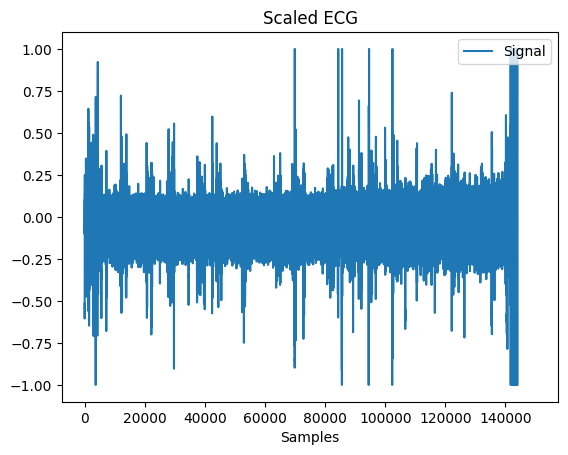

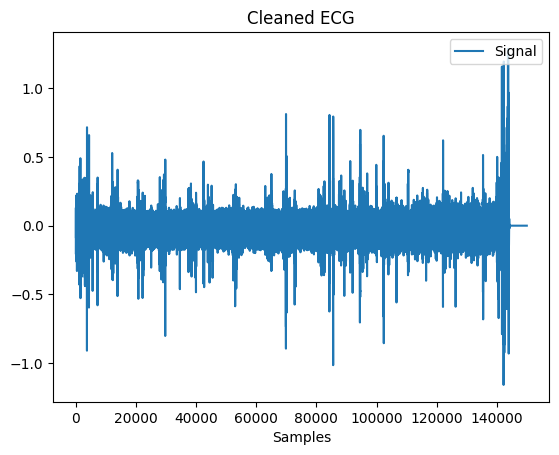

In [154]:
from sklearn.preprocessing import RobustScaler

# Calculate the mean and standard deviation
mean = my_data['ECG'].mean()
std_dev = my_data['ECG'].std()

remove_outlier = False
if remove_outlier:
    # Define your threshold for deviation from the mean
    threshold = 2

    # Filter out outliers
    outliers_mask = (my_data['ECG'] < mean - threshold * std_dev) | (my_data['ECG'] > mean + threshold * std_dev)

    outliers = my_data['ECG'][outliers_mask]

    filtered_ecg = my_data['ECG'][~outliers_mask]

    nk.signal_plot(my_data['ECG'])

    fig = plt.gcf()
    plt.title('Raw ECG')

    plt.figure()
    plt.scatter(my_data['timestamp'][outliers_mask], outliers, color = 'red')
    plt.scatter(my_data['timestamp'][~outliers_mask], filtered_ecg, color = 'blue')
    plt.title('Outlier Removal')
    # Reshape data for the scaler
    data_reshaped = filtered_ecg.values.reshape(-1, 1)
    
else:
    data_reshaped = my_data['ECG'].values.reshape(-1, 1)
    
# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the data with RobustScaler
data_robust_scaled = robust_scaler.fit_transform(data_reshaped)

# Manually scale to [-1, 1] based on the robustly scaled data
data_scaled_to_range = np.interp(data_robust_scaled, (data_robust_scaled.min(), data_robust_scaled.max()), (-1, 1))

# Convert back to a pandas series, if needed
ecg_data = pd.Series(data_scaled_to_range.flatten())

nk.signal_plot(ecg_data)

fig = plt.gcf()
plt.title('Scaled ECG')

# Process ecg
ecg_signals, info = nk.ecg_process(ecg_data, sampling_rate = SF, method = 'neurokit')
nk.signal_plot(ecg_signals['ECG_Clean'])
fig = plt.gcf()
plt.title('Cleaned ECG') 



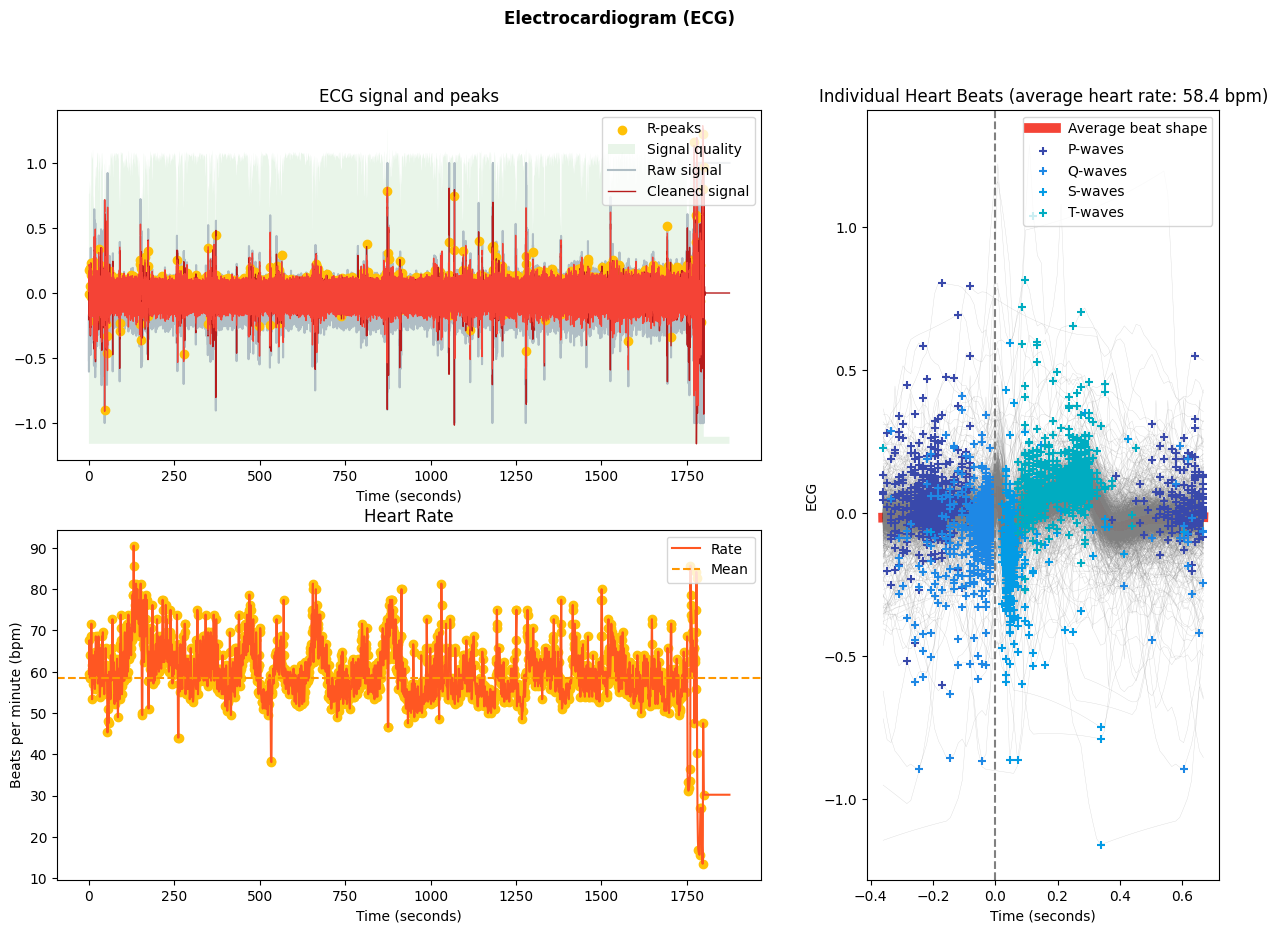

In [155]:
nk.ecg_plot(ecg_signals, info)
fig = plt.gcf()
fig.set_size_inches(15, 10, forward=True)
# fig.savefig("myfig.png")

These features include the RMSSD (square root of the mean of the sum of successive differences between adjacent RR intervals), MeanNN (mean of RR intervals) 

### Interval ECG

MeanNN: The mean of the RR intervals.

SDNN: The standard deviation of the RR intervals.

SDANN1, SDANN2, SDANN5: The standard deviation of average RR intervals extracted from n-minute segments of time series data (1, 2 and 5 by default). Note that these indices require a minimal duration of signal to be computed (3, 6 and 15 minutes respectively) and will be silently skipped if the data provided is too short.

SDNNI1, SDNNI2, SDNNI5: The mean of the standard deviations of RR intervals extracted from n-minute segments of time series data (1, 2 and 5 by default). Note that these indices require a minimal duration of signal to be computed (3, 6 and 15 minutes respectively) and will be silently skipped if the data provided is too short.

RMSSD: The square root of the mean of the squared successive differences between adjacent RR intervals. It is equivalent (although on another scale) to SD1, and therefore it is redundant to report correlations with both (Ciccone, 2017).

SDSD: The standard deviation of the successive differences between RR intervals.

CVNN: The standard deviation of the RR intervals (SDNN) divided by the mean of the RR intervals (MeanNN).

CVSD: The root mean square of successive differences (RMSSD) divided by the mean of the RR intervals (MeanNN).

MedianNN: The median of the RR intervals.

MadNN: The median absolute deviation of the RR intervals.

MCVNN: The median absolute deviation of the RR intervals (MadNN) divided by the median of the RR intervals (MedianNN).

IQRNN: The interquartile range (IQR) of the RR intervals.

SDRMSSD: SDNN / RMSSD, a time-domain equivalent for the low Frequency-to-High Frequency (LF/HF) Ratio (Sollers et al., 2007).

Prc20NN: The 20th percentile of the RR intervals (Han, 2017; Hovsepian, 2015).

Prc80NN: The 80th percentile of the RR intervals (Han, 2017; Hovsepian, 2015).

pNN50: The proportion of RR intervals greater than 50ms, out of the total number of RR intervals.

pNN20: The proportion of RR intervals greater than 20ms, out of the total number of RR intervals.

MinNN: The minimum of the RR intervals (Parent, 2019; Subramaniam, 2022).

MaxNN: The maximum of the RR intervals (Parent, 2019; Subramaniam, 2022).

TINN: A geometrical parameter of the HRV, or more specifically, the baseline width of the RR intervals distribution obtained by triangular interpolation, where the error of least squares determines the triangle. It is an approximation of the RR interval distribution.

HTI: The HRV triangular index, measuring the total number of RR intervals divided by the height of the RR intervals histogram.

In [156]:
epochs = nk.epochs_create(ecg_signals,
                            events = events,
                            sampling_rate = SF, 
                            baseline_correction=False)

ECG_Features = nk.ecg_intervalrelated(epochs)

c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation is smaller than the minimum duration of windows. Refer to the `scale` argument in `nk.fractal_dfa()` for more information.
  warn(
c:\Users\lauri\.virtualenvs\AML-dynaMix-AryBn7L8\Lib\site-packages\neurokit2\hrv\hrv_nonlinear.py:474: NeuroKitWarning: DFA_alpha2 related indices will not be calculated. The maximum duration of the windows provided for the long-term correlation 

In [157]:
# List of columns to be removed
columns_to_remove = ['HRV_SDANN1', 'HRV_SDNNI1', 'HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5','HRV_SDNNI5']

# Drop specified columns
ECG_Features_Clean = ECG_Features.drop(columns=columns_to_remove)

print(ECG_Features_Clean)


           Label  ECG_Rate_Mean             HRV_MeanNN  \
95.mp4    95.mp4      59.435335  [[80.84745762711864]]   
83.mp4    83.mp4      70.630361  [[67.97101449275362]]   
24.mp4    24.mp4      61.705649  [[77.88524590163935]]   
110.mp4  110.mp4      61.174917  [[78.58333333333333]]   
53.mp4    53.mp4      64.459056           [[74.59375]]   
73.mp4    73.mp4      58.272041  [[82.45614035087719]]   
64.mp4    64.mp4      59.667781  [[80.75862068965517]]   
12.mp4    12.mp4      59.426447  [[80.88135593220339]]   
55.mp4    55.mp4      59.147640  [[81.46551724137932]]   
44.mp4    44.mp4      60.035290  [[79.86440677966101]]   
71.mp4    71.mp4      56.744622  [[84.73214285714286]]   
5.mp4      5.mp4      56.156575  [[85.44642857142857]]   
54.mp4    54.mp4      60.473106  [[79.46666666666667]]   
45.mp4    45.mp4      58.542660  [[82.12280701754386]]   
17.mp4    17.mp4      58.386620  [[82.25862068965517]]   

                       HRV_SDNN              HRV_RMSSD               HR

### ECG Derived RSP Features

Returns: 

"RSP_Rate_Mean": the mean respiratory rate.

"RSP_Amplitude_Mean": the mean respiratory amplitude.

"RSP_RRV": the different respiratory rate variability metrices. See below.

"RSP_Phase_Duration_Inspiration": the average inspiratory duration.

"RSP_Phase_Duration_Expiration": the average expiratory duration.

"RSP_Phase_Duration_Ratio ": the inspiratory-to-expiratory time ratio (I/E).

#### RSP_RRV

"RRV_SDBB": the standard deviation of the breath-to-breath intervals.

"RRV_RMSSD": the root mean square of successive differences of the breath-to-breath intervals.

"RRV_SDSD": the standard deviation of the successive differences between adjacent breath-to-breath intervals.

"RRV_BBx": the number of successive interval differences that are greater than x seconds.

"RRV-pBBx": the proportion of breath-to-breath intervals that are greater than x seconds, out of the total number of intervals.

"RRV_VLF": spectral power density pertaining to very low frequency band (i.e., 0 to . 04 Hz) by default.

"RRV_LF": spectral power density pertaining to low frequency band (i.e., .04 to .15 Hz) by default.

"RRV_HF": spectral power density pertaining to high frequency band (i.e., .15 to .4 Hz) by default.

"RRV_LFHF": the ratio of low frequency power to high frequency power.

"RRV_LFn": the normalized low frequency, obtained by dividing the low frequency power by the total power.

"RRV_HFn": the normalized high frequency, obtained by dividing the low frequency power by total power.

"RRV_SD1": SD1 is a measure of the spread of breath-to-breath intervals on the Poincaré plot perpendicular to the line of identity. It is an index of short-term variability.

"RRV_SD2": SD2 is a measure of the spread of breath-to-breath intervals on the Poincaré plot along the line of identity. It is an index of long-term variability.

"RRV_SD2SD1": the ratio between short and long term fluctuations of the breath-to-breath intervals (SD2 divided by SD1).

"RRV_ApEn": the approximate entropy of RRV, calculated by entropy_approximate().

"RRV_SampEn": the sample entropy of RRV, calculated by entropy_sample().

"RRV_DFA_alpha1": the “short-term” fluctuation value generated from Detrended Fluctuation Analysis i.e. the root mean square deviation from the fitted trend of the breath-to-breath intervals. Will only be computed if mora than 160 breath cycles in the signal.

"RRV_DFA_alpha2": the long-term fluctuation value. Will only be computed if mora than 640 breath cycles in the signal.

Text(0, 0.5, 'Breaths Per Minute')

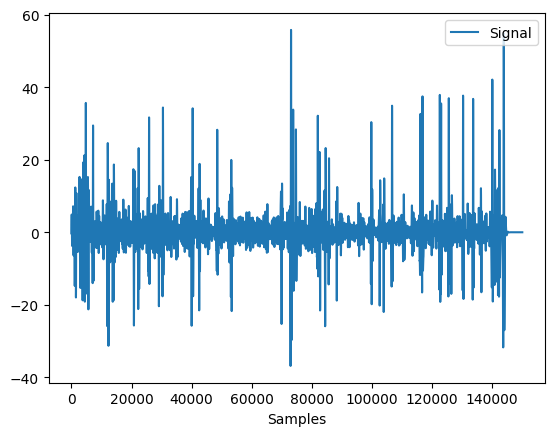

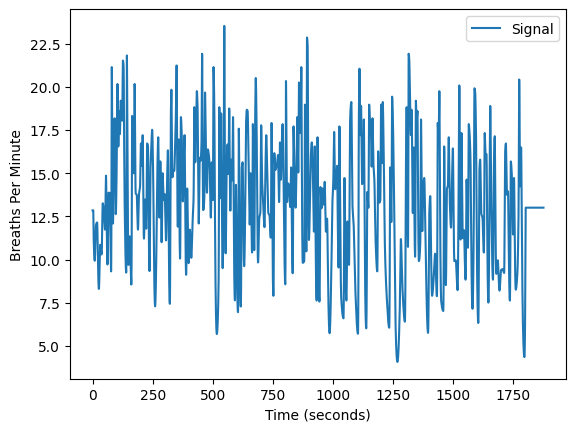

In [158]:
# # Extract peaks
rpeaks, info = nk.ecg_peaks(ecg_signals, sampling_rate=SF)

# Compute rate
ecg_rate = nk.ecg_rate(rpeaks, sampling_rate=SF, desired_length=len(my_data["ECG"]))

edr = nk.ecg_rsp(ecg_rate, sampling_rate=SF)

rsp_signals, rsp_info = nk.rsp_process(edr, 
            sampling_rate=SF)

# Visual comparison
nk.signal_plot(rsp_signals['RSP_Clean'])

# Visualize
nk.signal_plot(rsp_signals['RSP_Rate'], sampling_rate=SF)

plt.ylabel('Breaths Per Minute')


RSP interval Related

In [159]:
epochs = nk.epochs_create(rsp_signals,
                            events = events,
                            sampling_rate = SF, 
                            baseline_correction=False)

RSP_Features = nk.rsp_intervalrelated(epochs, sampling_rate=SF)

print(RSP_Features)

# List of columns to be removed
columns_to_remove = []

# Drop specified columns
RSP_Features_Clean = RSP_Features.drop(columns=columns_to_remove)

print(RSP_Features_Clean)

           Label  RSP_Rate_Mean    RRV_RMSSD   RRV_MeanBB     RRV_SDBB  \
95.mp4    95.mp4      11.599323  1463.603572  5233.750000   971.129247   
83.mp4    83.mp4      14.639183  2111.347072  4303.846154  1505.185348   
24.mp4    24.mp4      13.069970  1902.032406  4731.250000  1457.158076   
110.mp4  110.mp4      14.464748  1835.330352  4318.269231  1234.461921   
53.mp4    53.mp4      15.755469   957.906120  3808.928571   679.267645   
73.mp4    73.mp4      12.745582  3402.537071  4943.750000  2034.332451   
64.mp4    64.mp4      14.258811  1078.531023  4145.192308   880.866324   
12.mp4    12.mp4      14.167950  1947.517784  4328.846154  1178.578158   
55.mp4    55.mp4      13.664171  2746.966302  4663.541667  1677.918576   
44.mp4    44.mp4      11.640864  2899.205171  5375.000000  2027.421392   
71.mp4    71.mp4      14.928289  2595.333352  4183.653846  1800.219783   
5.mp4      5.mp4       9.307635  5150.455077  6621.875000  4170.612269   
54.mp4    54.mp4      13.399233  1707.

# PPG

C:\Users\lauri\AppData\Local\Temp\ipykernel_29568\2804726402.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data.loc[:, column + "_scaled"] = ppg_data_scaled
C:\Users\lauri\AppData\Local\Temp\ipykernel_29568\2804726402.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data.loc[:, column + "_scaled"] = ppg_data_scaled
C:\Users\lauri\AppData\Local\Temp\ipykernel_29568\2804726402.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

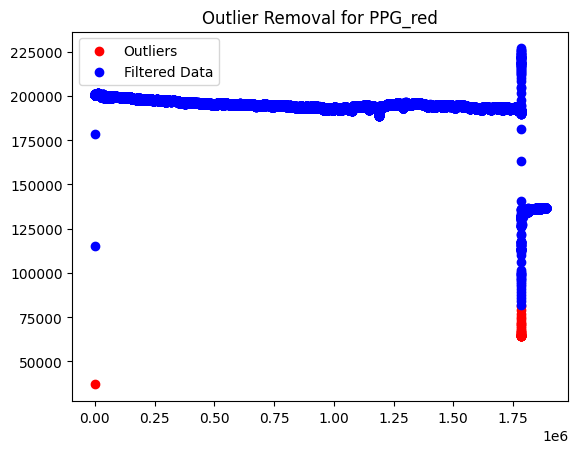

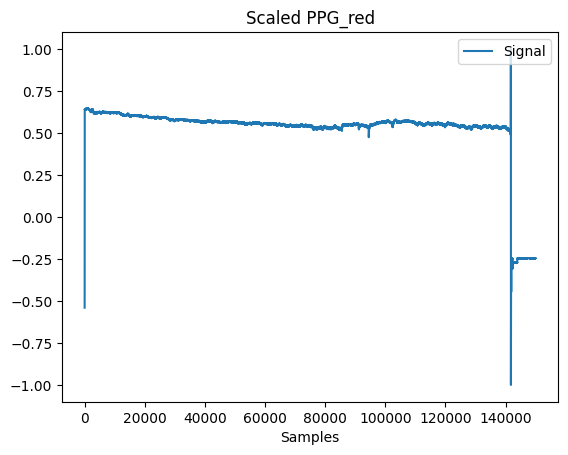

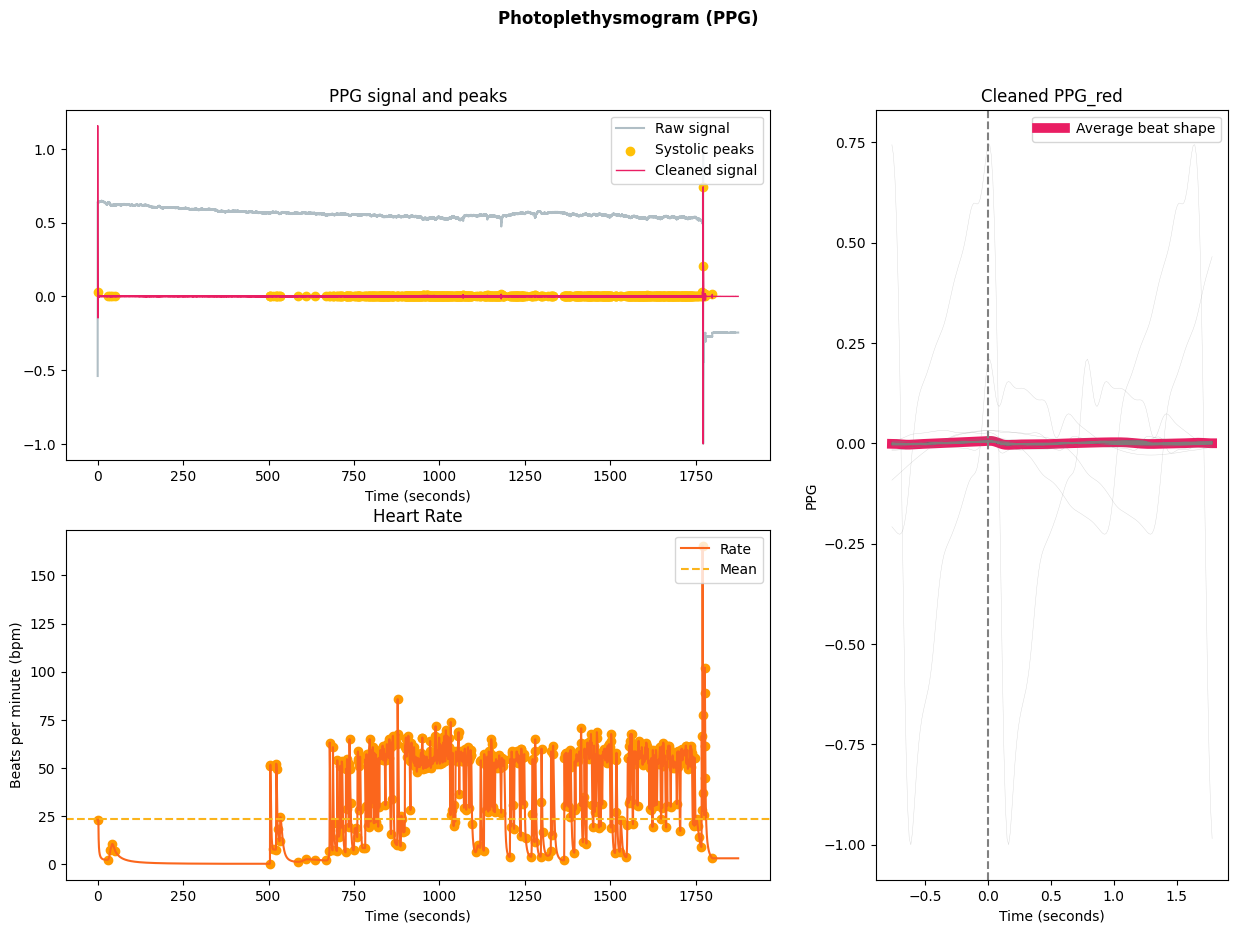

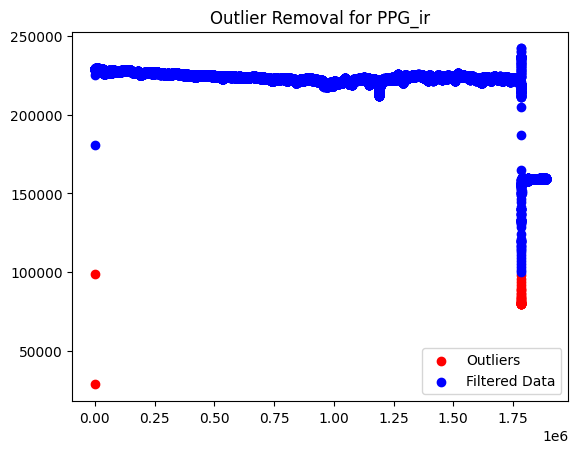

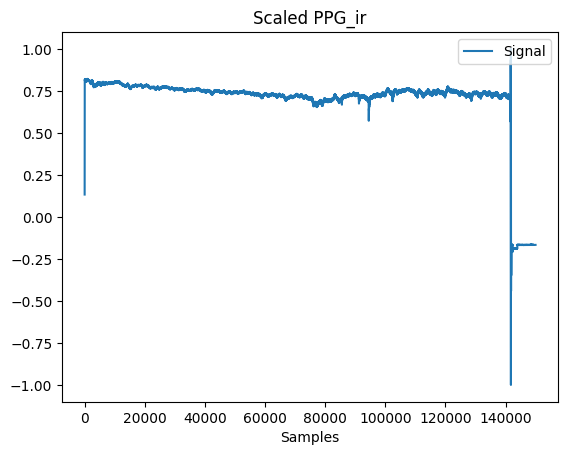

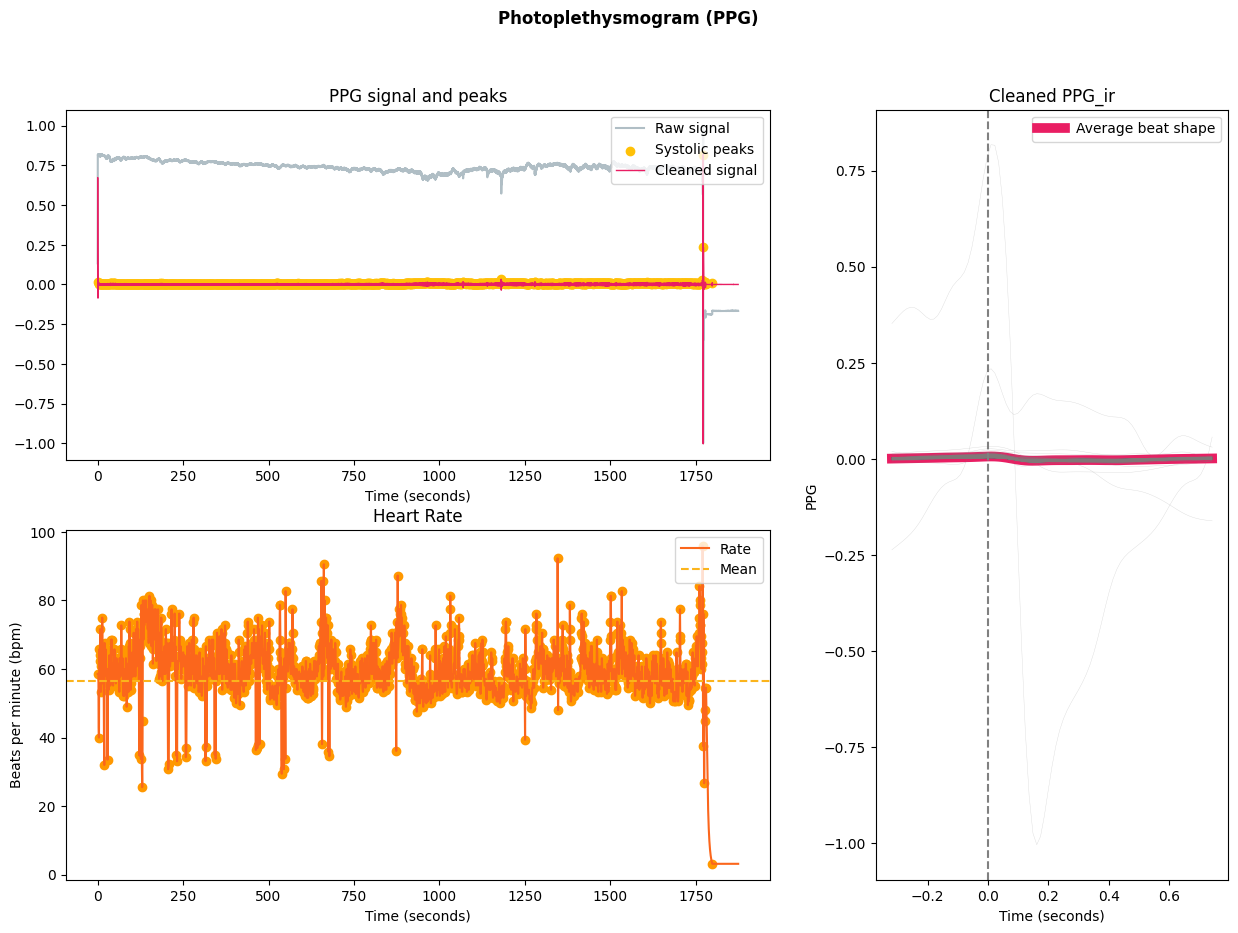

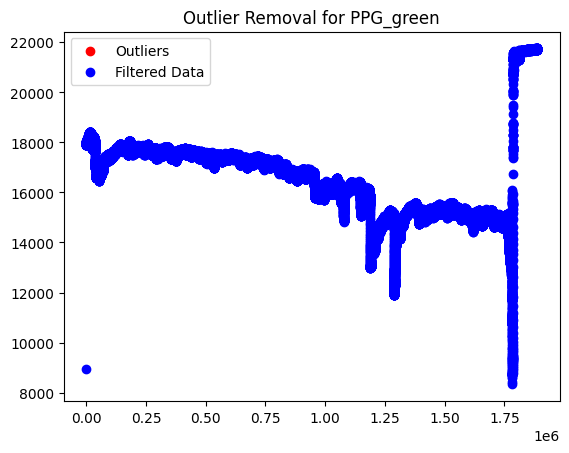

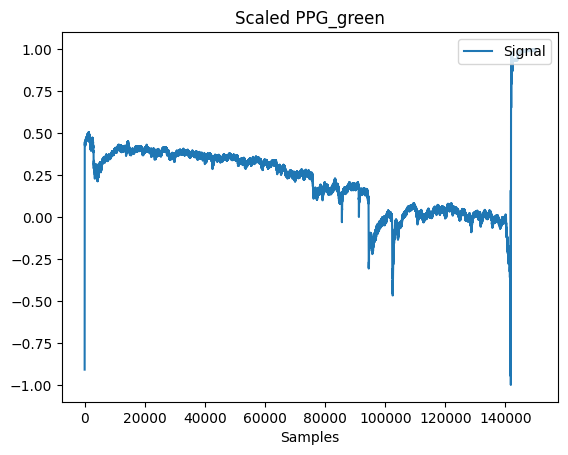

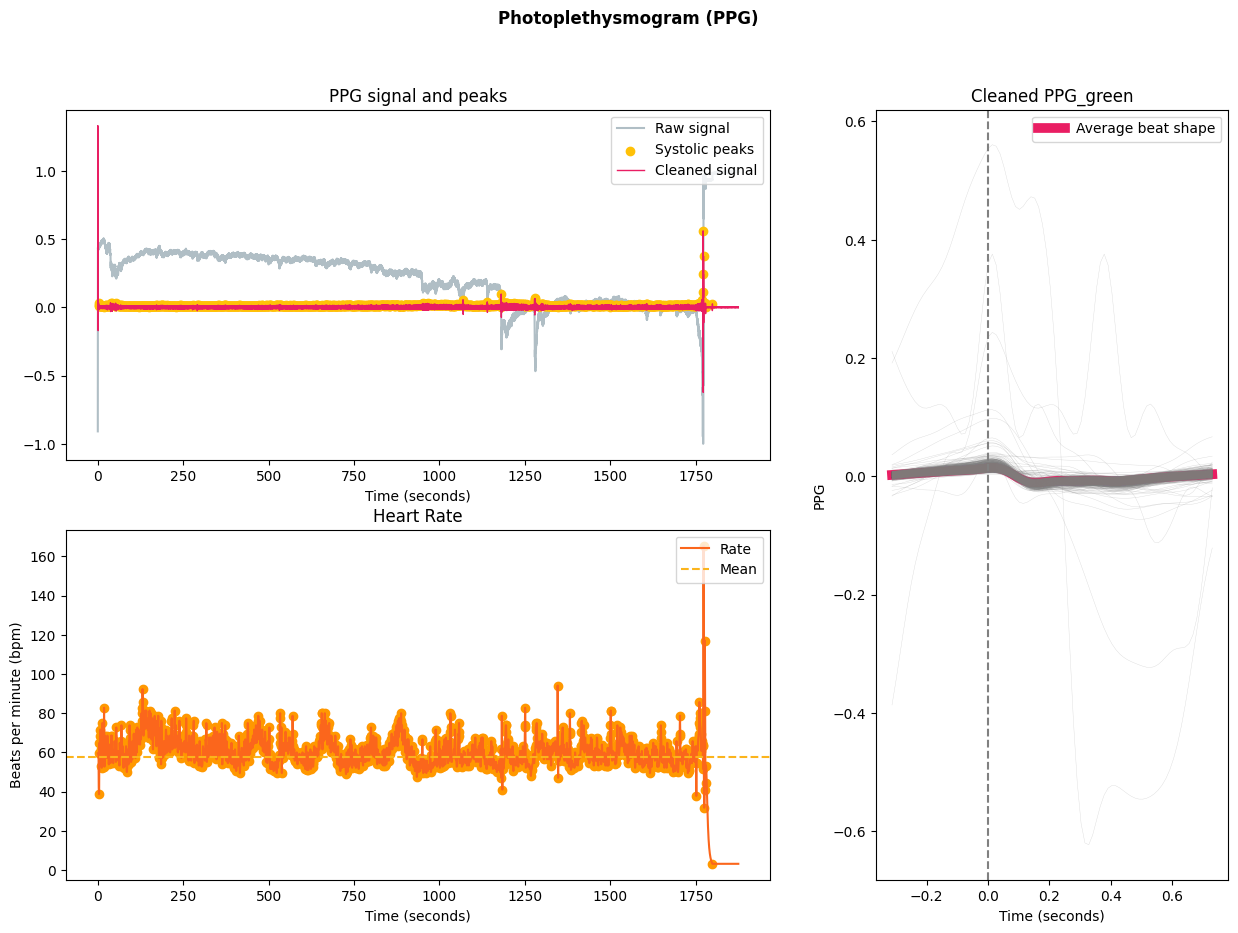

In [160]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk

# Columns to process
columns_to_process = ["PPG_red", "PPG_ir", "PPG_green"]

# Define your threshold for deviation from the mean
threshold = 8

ppg_data = {}
info = {}

for column in columns_to_process:
    
    data = my_data[column]
    # Calculate the mean and standard deviation for each column
    mean = data.mean()
    std_dev = data.std()

    # Filter out outliers
    outliers_mask = (data < mean - threshold * std_dev) | (data > mean + threshold * std_dev)
    outliers = data[outliers_mask]
    filtered_ppg = data[~outliers_mask]

    # Plotting
    plt.figure()
    plt.scatter(my_data['timestamp'][outliers_mask], outliers, color='red', label='Outliers')
    plt.scatter(my_data['timestamp'][~outliers_mask], filtered_ppg, color='blue', label='Filtered Data')
    plt.title(f'Outlier Removal for {column}')
    plt.legend()

    # Reshape data for the scaler
    data_reshaped = filtered_ppg.values.reshape(-1, 1)

    # Initialize the RobustScaler
    robust_scaler = RobustScaler()

    # Fit and transform the data with RobustScaler
    data_robust_scaled = robust_scaler.fit_transform(data_reshaped)

    # Manually scale to [-1, 1] based on the robustly scaled data
    data_scaled_to_range = np.interp(data_robust_scaled, (data_robust_scaled.min(), data_robust_scaled.max()), (-1, 1))

    # Convert back to a pandas series
    ppg_data_scaled = pd.Series(data_scaled_to_range.flatten(), name=column + "_scaled")

    # Append the scaled data to my_data DataFrame or handle it as needed
    my_data.loc[:, column + "_scaled"] = ppg_data_scaled

    # Plotting scaled data
    nk.signal_plot(ppg_data_scaled)  # This line assumes you want to plot with neurokit2, adjust as necessary
    plt.title(f'Scaled {column}')
    
    # Process the PPG data with NeuroKit2
    processed_data, processed_info = nk.ppg_process(ppg_data_scaled, sampling_rate=SF, method='elgendi')
    
    # Store the processed data and info in dictionaries
    ppg_data[column] = processed_data
    info[column] = processed_info

    # Plot the cleaned PPG data
    nk.ppg_plot(processed_data, processed_info)
    plt.gcf().set_size_inches(15, 10, forward=True)
    plt.title(f'Cleaned {column}')
    
plt.show()

In [164]:
ppg_data

{'PPG_red':          PPG_Raw  PPG_Clean   PPG_Rate  PPG_Peaks
 0      -0.540237  -0.000262  22.841559          0
 1       0.331509   0.418351  22.841559          0
 2       0.639500   0.771106  22.841559          0
 3       0.639183   1.014380  22.841559          0
 4       0.639011   1.137474  22.841559          0
 ...          ...        ...        ...        ...
 149963 -0.245687  -0.000165   2.998126          0
 149964 -0.245756  -0.000150   2.998126          0
 149965 -0.245522  -0.000117   2.998126          0
 149966 -0.245239  -0.000068   2.998126          0
 149967 -0.245391  -0.000010   2.998126          0
 
 [149968 rows x 4 columns],
 'PPG_ir':          PPG_Raw  PPG_Clean   PPG_Rate  PPG_Peaks
 0       0.133176  -0.000794  58.576905          0
 1       0.761518   0.247813  58.576905          0
 2       0.811807   0.455724  58.576905          0
 3       0.811729   0.596611  58.576905          0
 4       0.811694   0.664953  58.576905          0
 ...          ...        ...   

In [161]:
events

{'onset': [800.1842880249023,
  9604.346981048584,
  18410.062923431396,
  27213.337078094482,
  36016.6579246521,
  44821.469287872314,
  53625.98798751831,
  62429.9896812439,
  71235.19163131714,
  80039.60710525513,
  88844.46472167969,
  97649.17682647705,
  106454.54586029053,
  115259.85195159912,
  124062.98332214355],
 'duration': [4800.17557144165,
  4800.164623260498,
  4800.166168212891,
  4800.390548706055,
  4800.218906402588,
  4800.193710327148,
  4800.184593200684,
  4800.221481323242,
  4800.198287963867,
  4800.197315216064,
  4800.213928222656,
  4800.208415985107,
  4800.164337158203,
  4800.181903839111,
  4800.179462432861],
 'label': ['95.mp4',
  '83.mp4',
  '24.mp4',
  '110.mp4',
  '53.mp4',
  '73.mp4',
  '64.mp4',
  '12.mp4',
  '55.mp4',
  '44.mp4',
  '71.mp4',
  '5.mp4',
  '54.mp4',
  '45.mp4',
  '17.mp4'],
 'condition': [3, 2, 2, 4, 4, 1, 1, 1, 4, 3, 1, 1, 4, 3, 2]}

In [166]:
columns_to_process = ["PPG_red", "PPG_ir", "PPG_green"]

PPG_Features = {}

for column in columns_to_process:
    # Creating epochs
    
    epochs = nk.epochs_create(ppg_data[column],
                            events = events,
                            sampling_rate = SF, 
                            baseline_correction=False)
    
                              
    PPG_Features[column] = nk.ppg_intervalrelated(epochs)

    print(column)

PPG_red


ValueError: NeuroKit error: the window cannot contain more data points than the time series. Decrease 'scale'.

In [ ]:
columns_to_process = ["PPG_red", "PPG_ir", "PPG_green"]
# List of columns to be removed
columns_to_remove = ['HRV_SDNN', 'HRV_SDNNI1', 'HRV_SDANN1', 'HRV_SDANN2', 'HRV_SDNNI2', 'HRV_SDANN5', 'HRV_SDNNI5']

PPG_Features_Clean = PPG_Features.copy()

for column in columns_to_process:
    
    # Make a copy of the DataFrame to ensure the original is not modified
    PPG_Features_Clean[column] = PPG_Features[column].copy()

    # Drop specified columns from the copy
    PPG_Features_Clean[column] = PPG_Features_Clean[column].drop(columns=columns_to_remove)

print(PPG_Features_Clean)


{'PPG_red':            Label  PPG_Rate_Mean  HRV_MeanNN  HRV_RMSSD   HRV_SDSD  HRV_CVNN  \
53.mp4    53.mp4      82.676888   58.271605  25.583931  25.744973  0.354428   
73.mp4    73.mp4      86.390424   55.571429  21.640825  21.772351  0.265578   
2.mp4      2.mp4      79.693942   60.792208  30.513802  30.716482  0.358174   
58.mp4    58.mp4      91.179234   52.155556  10.052111  10.108755  0.130798   
23.mp4    23.mp4      88.564551   53.724138   6.239410   6.275612  0.094387   
119.mp4  119.mp4      87.868505   54.267442  16.869046  16.968351  0.226930   
62.mp4    62.mp4      91.017391   52.355556  11.171794  11.234727  0.146957   
44.mp4    44.mp4      89.862350   52.772727  12.139041  12.209063  0.165488   
25.mp4    25.mp4      91.047638   52.088889   5.824204   5.857104  0.096254   
28.mp4    28.mp4      89.208714   53.284091  11.623401  11.690578  0.158480   
33.mp4    33.mp4      90.575103   52.393258   6.582518   6.620231  0.085096   
72.mp4    72.mp4      88.618934   53.574

# GSR

### EDA

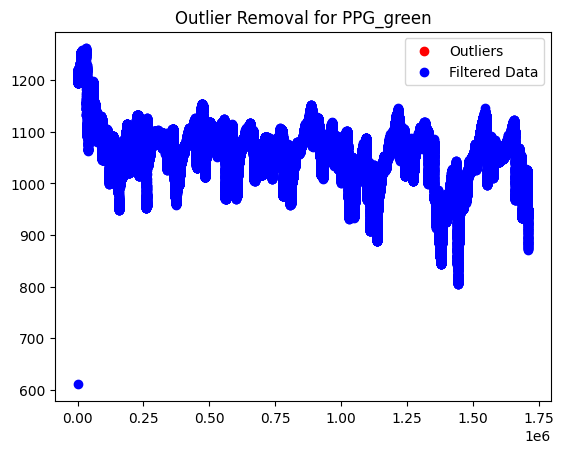

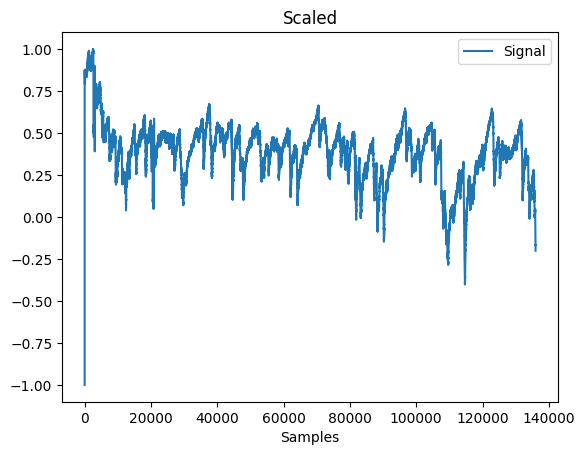

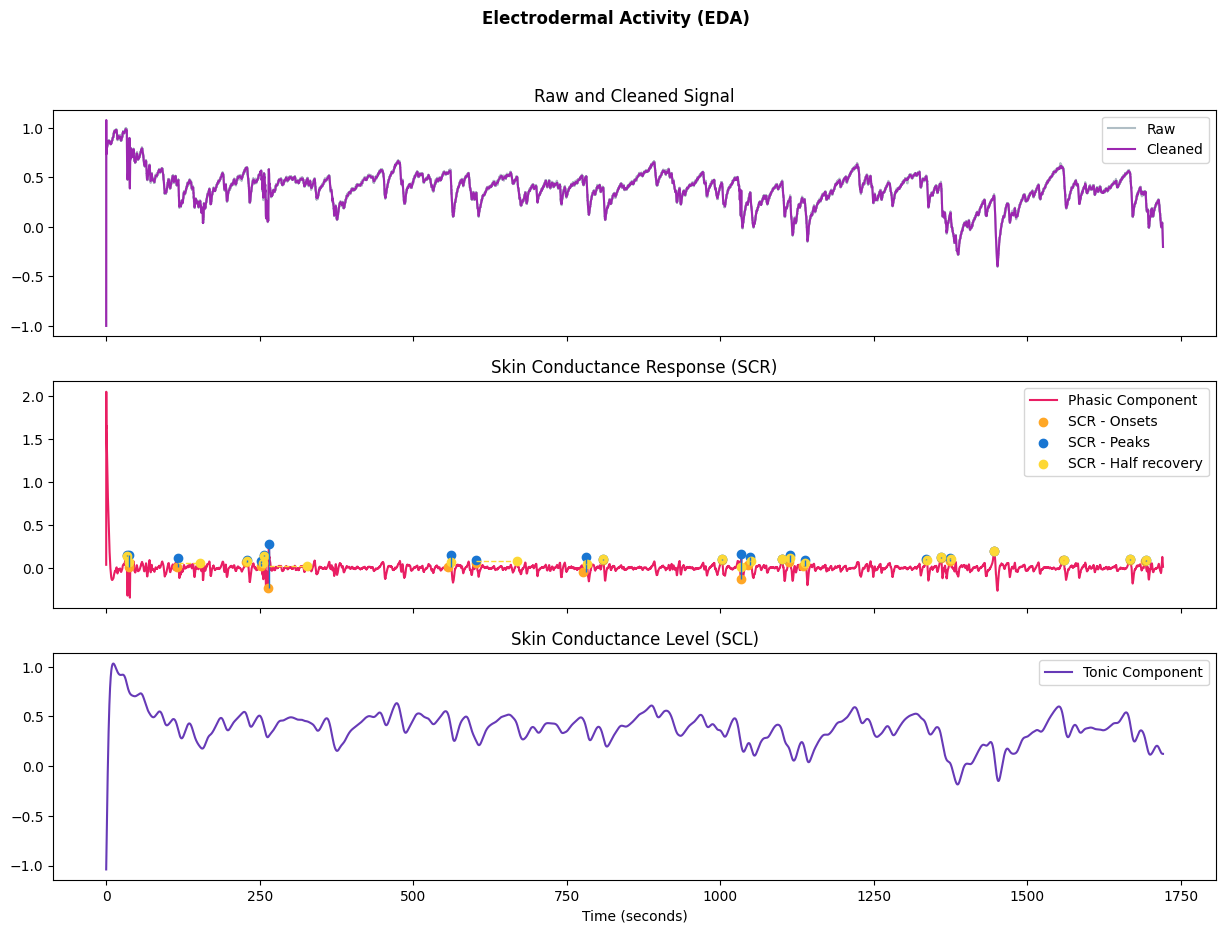

In [ ]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk

# Columns to process
columns_to_process = ["PPG_red", "PPG_ir", "PPG_green"]

# Define your threshold for deviation from the mean
threshold = 8


data = my_data['GSR']
# Calculate the mean and standard deviation for each column
mean = data.mean()
std_dev = data.std()

# Filter out outliers
outliers_mask = (data < mean - threshold * std_dev) | (data > mean + threshold * std_dev)
outliers = data[outliers_mask]
filtered_GSR = data[~outliers_mask]

# Plotting
plt.figure()
plt.scatter(my_data['timestamp'][outliers_mask], outliers, color='red', label='Outliers')
plt.scatter(my_data['timestamp'][~outliers_mask], filtered_GSR, color='blue', label='Filtered Data')
plt.title(f'Outlier Removal for {column}')
plt.legend()

# Reshape data for the scaler
data_reshaped = filtered_GSR.values.reshape(-1, 1)

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the data with RobustScaler
data_robust_scaled = robust_scaler.fit_transform(data_reshaped)

# Manually scale to [-1, 1] based on the robustly scaled data
data_scaled_to_range = np.interp(data_robust_scaled, (data_robust_scaled.min(), data_robust_scaled.max()), (-1, 1))

# Convert back to a pandas series
gsr_data_scaled = pd.Series(data_scaled_to_range.flatten())

# Plotting scaled data
nk.signal_plot(gsr_data_scaled)  # This line assumes you want to plot with neurokit2, adjust as necessary
plt.title('Scaled')

# Process the PPG data with NeuroKit2
eda_signals, eda_info = nk.eda_process(gsr_data_scaled, sampling_rate=SF)


# Plot the cleaned PPG data
nk.eda_plot(eda_signals, eda_info)
plt.gcf().set_size_inches(15, 10, forward=True)
    
plt.show()

In [ ]:
# Creating epochs
epochs = nk.epochs_create(eda_signals, 
                            events = events, 
                            sampling_rate = SF, 
                            baseline_correction=False)

                            
EDA_Features = nk.eda_intervalrelated(epochs)


print(EDA_Features)

# List of columns to be removed
columns_to_remove = ['EDA_Sympathetic', 'EDA_SympatheticN', 'EDA_Autocorrelation']

# Drop specified columns
EDA_Features_Clean = EDA_Features.drop(columns=columns_to_remove)

           Label  SCR_Peaks_N  SCR_Peaks_Amplitude_Mean  EDA_Tonic_SD  \
53.mp4    53.mp4            2                  0.076969      0.133601   
73.mp4    73.mp4            0                       NaN      0.076623   
2.mp4      2.mp4            3                  0.190049      0.061934   
58.mp4    58.mp4            0                       NaN      0.101674   
23.mp4    23.mp4            0                       NaN      0.085601   
119.mp4  119.mp4            2                  0.086672      0.090560   
62.mp4    62.mp4            0                       NaN      0.052593   
44.mp4    44.mp4            2                  0.089198      0.064284   
25.mp4    25.mp4            0                       NaN      0.095470   
28.mp4    28.mp4            3                  0.129697      0.118461   
33.mp4    33.mp4            2                  0.078902      0.081901   
72.mp4    72.mp4            0                       NaN      0.076845   
91.mp4    91.mp4            3                  0.01

In [ ]:
print(EDA_Features_Clean)

           Label  SCR_Peaks_N  SCR_Peaks_Amplitude_Mean  EDA_Tonic_SD
53.mp4    53.mp4            2                  0.076969      0.133601
73.mp4    73.mp4            0                       NaN      0.076623
2.mp4      2.mp4            3                  0.190049      0.061934
58.mp4    58.mp4            0                       NaN      0.101674
23.mp4    23.mp4            0                       NaN      0.085601
119.mp4  119.mp4            2                  0.086672      0.090560
62.mp4    62.mp4            0                       NaN      0.052593
44.mp4    44.mp4            2                  0.089198      0.064284
25.mp4    25.mp4            0                       NaN      0.095470
28.mp4    28.mp4            3                  0.129697      0.118461
33.mp4    33.mp4            2                  0.078902      0.081901
72.mp4    72.mp4            0                       NaN      0.076845
91.mp4    91.mp4            3                  0.013988      0.211861
27.mp4    27.mp4    

# Save Feature Data

In [ ]:
print(PPG_Features_Clean)

{'PPG_red':            Label  PPG_Rate_Mean  HRV_MeanNN  HRV_RMSSD   HRV_SDSD  HRV_CVNN  \
53.mp4    53.mp4      82.676888   58.271605  25.583931  25.744973  0.354428   
73.mp4    73.mp4      86.390424   55.571429  21.640825  21.772351  0.265578   
2.mp4      2.mp4      79.693942   60.792208  30.513802  30.716482  0.358174   
58.mp4    58.mp4      91.179234   52.155556  10.052111  10.108755  0.130798   
23.mp4    23.mp4      88.564551   53.724138   6.239410   6.275612  0.094387   
119.mp4  119.mp4      87.868505   54.267442  16.869046  16.968351  0.226930   
62.mp4    62.mp4      91.017391   52.355556  11.171794  11.234727  0.146957   
44.mp4    44.mp4      89.862350   52.772727  12.139041  12.209063  0.165488   
25.mp4    25.mp4      91.047638   52.088889   5.824204   5.857104  0.096254   
28.mp4    28.mp4      89.208714   53.284091  11.623401  11.690578  0.158480   
33.mp4    33.mp4      90.575103   52.393258   6.582518   6.620231  0.085096   
72.mp4    72.mp4      88.618934   53.574

In [ ]:
import json

# Function to convert NumPy types to Python native types for JSON serialization
def convert_np_types(obj):
    if isinstance(obj, np.ndarray):
        return obj.tolist()
    elif isinstance(obj, np.generic):
        return obj.item()
    raise TypeError(f"Object of type '{obj.__class__.__name__}' is not JSON serializable")


# Combine your DataFrames into a dictionary with unique labels
dfs = {
    "ECG Features": ECG_Features_Clean,
    "RSP Features": RSP_Features_Clean,
    "PPG IR Features": PPG_Features_Clean['PPG_ir'],
    "PPG Red Features": PPG_Features_Clean['PPG_red'],
    "PPG Green Features": PPG_Features_Clean['PPG_green'],
    "EDA Features": EDA_Features_Clean
}

# Convert each DataFrame into a JSON string and store it back in the dictionary
for label, df in dfs.items():
    # Convert DataFrame to a JSON-friendly structure (e.g., records) then to a string
    dfs[label] = df.to_dict(orient="records")

# Serialize the dictionary to a JSON string
json_str = json.dumps(dfs, indent=4, default=convert_np_types)

# To save the JSON string to a file
with open(f'Features/{name}_Features.json', 'w') as f:
    f.write(json_str)
